<a href="https://colab.research.google.com/github/kiet1043/AI-homeworks/blob/main/MONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training=train_data.flow_from_directory('/content/drive/MyDrive/Data_AI/money_train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2750 images belonging to 11 classes.


In [4]:
training.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
train=model.fit(training,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
86/86 [==============================] - 416s 5s/step - loss: 1.8165 - accuracy: 0.3436
Epoch 2/20
86/86 [==============================] - 22s 256ms/step - loss: 0.8447 - accuracy: 0.6735
Epoch 3/20
86/86 [==============================] - 20s 233ms/step - loss: 0.5833 - accuracy: 0.7749
Epoch 4/20
86/86 [==============================] - 22s 255ms/step - loss: 0.4604 - accuracy: 0.8193
Epoch 5/20
86/86 [==============================] - 21s 240ms/step - loss: 0.3473 - accuracy: 0.8658
Epoch 6/20
86/86 [==============================] - 21s 244ms/step - loss: 0.2990 - accuracy: 0.8833
Epoch 7/20
86/86 [==============================] - 22s 252ms/step - loss: 0.2687 - accuracy: 0.8964
Epoch 8/20
86/86 [==============================] - 21s 245ms/step - loss: 0.2576 - accuracy: 0.9022
Epoch 9/20
86/86 [==============================] - 20s 235ms/step - loss: 0.1818 - accuracy: 0.9302
Epoch 10/20
86/86 [==============================] - 22s 256ms/step - loss: 0.1642 - accuracy

In [7]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08259262144565582
Train Accuracy 0.9698181748390198


In [8]:
# Lưu 
model.save("/content/drive/MyDrive/Data_AI/VN_Money.h5")

In [9]:
model_1=load_model('/content/drive/MyDrive/Data_AI/VN_Money.h5')

1/1 [==============================] - 0s 317ms/step
20K


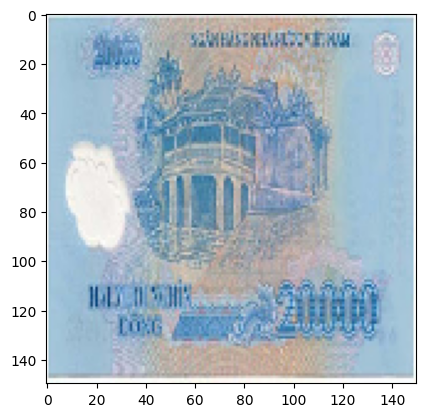

1/1 [==============================] - 0s 31ms/step
100K


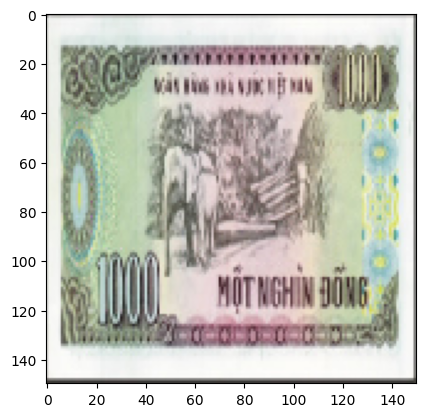

1/1 [==============================] - 0s 30ms/step
50K


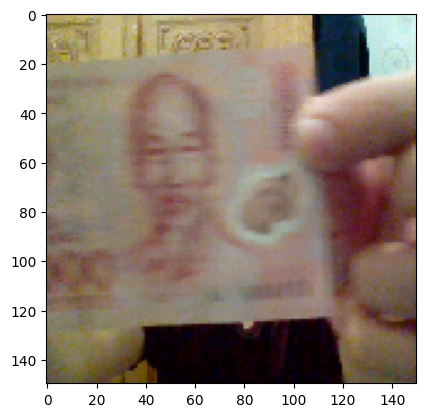

1/1 [==============================] - 0s 21ms/step
20K


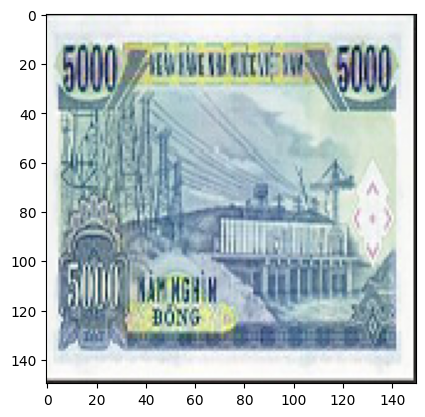

1/1 [==============================] - 0s 19ms/step
500K


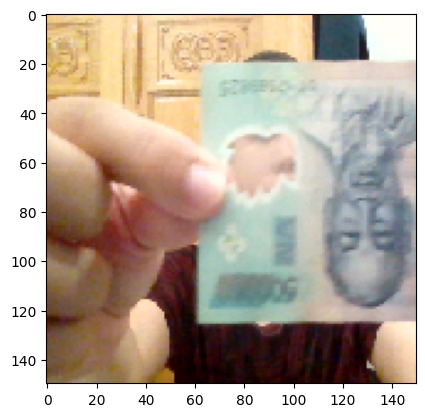

1/1 [==============================] - 0s 18ms/step
200


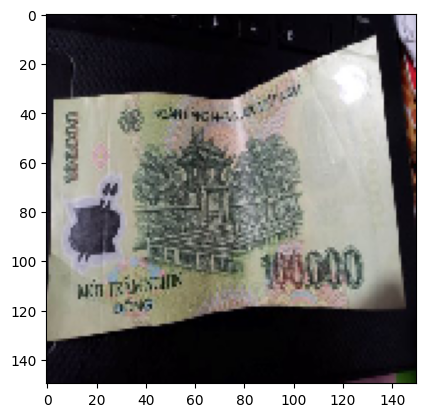

In [10]:
folder="/content/drive/MyDrive/Data_AI/money_test/"

for i in os.listdir(folder):
  img=load_img(folder+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['1K','10K','100K','200','2k','20K','200K','500','5k','50K','500K']
  print(class_name[result])
  plt.show()

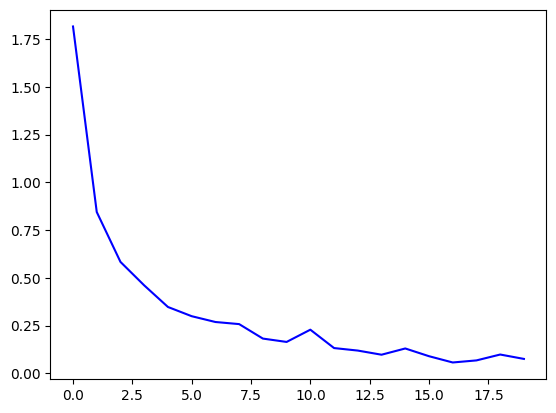

In [12]:
#Vẽ biểu đồ thể hiện sự mất mát qua số lần train
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()     